Background
Twitter has become a wildly sprawling jungle of information—140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out per day. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

News Mood
In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.
The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.
As final considerations:

Use the Matplotlib and Seaborn libraries.
Include a written description of three observable trends based on the data.
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
Include an exported markdown version of your Notebook called  README.md in your GitHub repository.


In [1]:
#Dependencies
import os
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime
import requests
from random import uniform
import tweepy
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#API keys
from config import consumer_key
from config import consumer_secret
from config import access_token
from config import access_token_secret


In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

Twitter Handles:
(1) BBC - @BBC - https://twitter.com/BBC?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor
(2) CBS - @CBS - https://twitter.com/CBS?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor
(3) CNN - @CNN - https://twitter.com/CNN?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor
(4) Fox - @FoxNews - https://twitter.com/foxnews?lang=en
(5) New york Times - @nytimes -https://twitter.com/nytimes?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor

In [3]:
#target users:
target_user = ["@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes"]

In [4]:
#lists
twt_handle = []
text = []
date = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweets_ago = []

In [12]:
for user in target_user:
    count = 0
    for x in range(5):
#        count=0
        public_tweets = api.user_timeline(user,page=x)
        
        for tweet in public_tweets:
            count += 1
            twt_handle.append(user)
            text.append(tweet['text'])
            tweets_ago.append(count)
            date.append(tweet['created_at'])
            
            
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

In [13]:
tweets = {
        "Tweets Ago" : tweets_ago,
        "Twitter Name": twt_handle,
        "Tweet" : text,
        "Date" : date,
        "Compound Score" : compound_list,
        "Positive Score" : positive_list,
        "Negative Score" : negative_list,
        "Neutral Score" : neutral_list
}

In [14]:
tweets_df = pd.DataFrame(tweets, columns = ["Tweets Ago","Twitter Name", "Tweet", "Date", "Compound Score", "Positive Score", "Negative Score", "Neutral Score"])
tweets_df.to_csv('Tweets.csv')
tweets_df

,Tweets Ago,Twitter Name,Tweet,Date,Compound Score,Positive Score,Negative Score,Neutral Score
0,1,@BBC,Could this be an answer to global water shorta...,Sun Mar 25 19:44:01 +0000 2018,0.1280,0.101,0.077,0.821
1,2,@BBC,"Tonight, @regyates meets people whose lives ha...",Sun Mar 25 19:15:06 +0000 2018,-0.7506,0.000,0.286,0.714
2,3,@BBC,"Tonight, @mcgregor_ewan and @McgColin celebrat...",Sun Mar 25 18:40:04 +0000 2018,0.5719,0.163,0.000,0.837
3,4,@BBC,The first ever statue of David Bowie has been ...,Sun Mar 25 18:13:03 +0000 2018,0.0000,0.000,0.000,1.000
4,5,@BBC,When you're enjoying being single and people j...,Sun Mar 25 17:30:07 +0000 2018,0.5267,0.185,0.000,0.815
5,6,@BBC,"🇺🇸🏝🇬🇧 Welcome to Tangier Island, the tiny US i...",Sun Mar 25 15:03:03 +0000 2018,0.4588,0.167,0.000,0.833
6,7,@BBC,💬 We could listen to him speak all day. \n\n📽 ...,Sun Mar 25 14:30:02 +0000 2018,0.0000,0.000,0.000,1.000
7,8,@BBC,"Predictions suggest a build-up of about 80,000...",Sun Mar 25 14:09:03 +0000 2018,0.1779,0.091,0.000,0.909
8,9,@BBC,👽✨🛸 @prattprattpratt stars as a happy-go-lucky...,Sun Mar 25 13:03:04 +0000 2018,0.5574,0.184,0.000,0.816
9,10,@BBC,"Weighing just 100g, a newborn panda is one 900...",Sun Mar 25 12:03:02 +0000 2018,0.0000,0.000,0.000,1.000


In [15]:
#plt.scatter(tweets_df['Twitter Name'], tweets_df['Compound Score'], tweets_df['count'])

In [16]:
bbc = tweets_df.loc[tweets_df['Twitter Name'] == '@BBC']
cbs = tweets_df.loc[tweets_df['Twitter Name'] == '@CBS']
cnn = tweets_df.loc[tweets_df['Twitter Name'] == '@CNN']
fox = tweets_df.loc[tweets_df['Twitter Name'] == '@FoxNews']
nyc = tweets_df.loc[tweets_df['Twitter Name'] == '@nytimes']

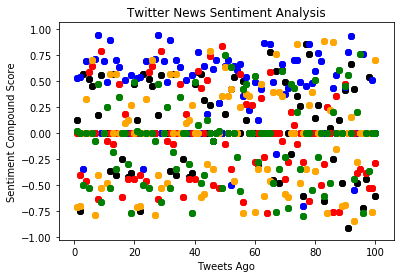

In [17]:
plt.scatter(bbc['Tweets Ago'],bbc['Compound Score'], color='black', label="BBC")
plt.scatter(cbs['Tweets Ago'],cbs['Compound Score'], color='blue', label="BBC")
plt.scatter(cnn['Tweets Ago'],cnn['Compound Score'], color='red', label="BBC")
plt.scatter(fox['Tweets Ago'],fox['Compound Score'], color='orange', label="BBC")
plt.scatter(nyc['Tweets Ago'],nyc['Compound Score'], color='green', label="BBC")
plt.xlabel('Tweets Ago')
plt.ylabel("Sentiment Compound Score")
plt.title('Twitter News Sentiment Analysis')
#plt.legend()
#plt.legend would not seperate out plot....
plt.show()
plt.savefig('Scatter.png')

In [18]:
a = bbc['Compound Score'].mean()
b = cbs['Compound Score'].mean()
c = cnn['Compound Score'].mean()
d = fox['Compound Score'].mean()
e = nyc['Compound Score'].mean()

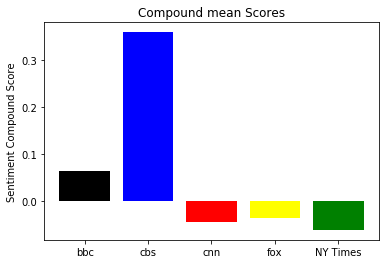

In [19]:
plt.bar("bbc", a, color = "black")
plt.bar("cbs", b , color = "blue")
plt.bar("cnn", c, color = "red")
plt.bar("fox", d, color = "yellow")
plt.bar("NY Times", e, color = "green")
plt.ylabel("Sentiment Compound Score")
plt.title("Compound mean Scores")
plt.show()
plt.savefig('Analysis_Mean.png')